<a href="https://colab.research.google.com/github/kellykhy/DL2022-1/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## HW 2
Answer following questions 



### Below is one of the example code for binary-class classification problem on IMDB dataset

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


In [2]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [3]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [4]:
y_train[:5]

array([1., 0., 0., 1., 0.], dtype=float32)

In [5]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [6]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [7]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [8]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 69ms/step - loss: 0.5265 - accuracy: 0.7881 - val_loss: 0.4008 - val_accuracy: 0.8626
Epoch 2/20
30/30 [==============================] - 1s 50ms/step - loss: 0.3195 - accuracy: 0.9027 - val_loss: 0.3137 - val_accuracy: 0.8849
Epoch 3/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2332 - accuracy: 0.9277 - val_loss: 0.2847 - val_accuracy: 0.8874
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1816 - accuracy: 0.9439 - val_loss: 0.2739 - val_accuracy: 0.8900
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1482 - accuracy: 0.9540 - val_loss: 0.2767 - val_accuracy: 0.8886
Epoch 6/20
30/30 [==============================] - 1s 45ms/step - loss: 0.1231 - accuracy: 0.9621 - val_loss: 0.2917 - val_accuracy: 0.8844
Epoch 7/20
30/30 [==============================] - 1s 47ms/step - loss: 0.1009 - accuracy: 0.9709 - val_loss: 0.3380 - val_accuracy: 0.8763
Epoch 8/20
30

### Q1 Binary classification is multi-class classification with two classes so we can modify our model as below:

In [9]:
model2 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(2, activation="softmax")
])

### Complete the codes for compile and model fitting. 

In [10]:
model2.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [11]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [12]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [13]:
history = model2.fit(partial_x_train,
           partial_y_train,
           epochs=20,
           batch_size=512,
           validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 74ms/step - loss: 0.4966 - accuracy: 0.7852 - val_loss: 0.3635 - val_accuracy: 0.8715
Epoch 2/20
30/30 [==============================] - 1s 46ms/step - loss: 0.2869 - accuracy: 0.9041 - val_loss: 0.2933 - val_accuracy: 0.8907
Epoch 3/20
30/30 [==============================] - 1s 46ms/step - loss: 0.2070 - accuracy: 0.9321 - val_loss: 0.2797 - val_accuracy: 0.8883
Epoch 4/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1674 - accuracy: 0.9428 - val_loss: 0.2766 - val_accuracy: 0.8898
Epoch 5/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1330 - accuracy: 0.9568 - val_loss: 0.3498 - val_accuracy: 0.8654
Epoch 6/20
30/30 [==============================] - 1s 42ms/step - loss: 0.1094 - accuracy: 0.9667 - val_loss: 0.3138 - val_accuracy: 0.8864
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0874 - accuracy: 0.9751 - val_loss: 0.3229 - val_accuracy: 0.8827
Epoch 8/20
30

### Q2 Below is visualization of the validation loss. We can see overfitting after 5 epochs.  

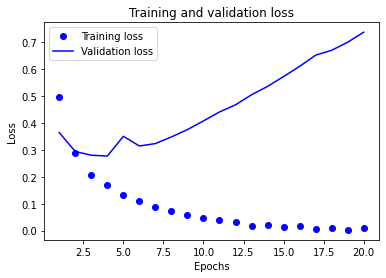

In [14]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Add dropout layers and visualize the validation loss of your new model.

In [15]:
## Add dropout layers 

model2_dr = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(2, activation="softmax")
])

## retrain and visualize the validation loss of new model
model2_dr.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
history2_dr = model2_dr.fit(partial_x_train,
               partial_y_train,
               epochs=20,
               batch_size=512,
               validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 59ms/step - loss: 0.6132 - accuracy: 0.6589 - val_loss: 0.4741 - val_accuracy: 0.8510
Epoch 2/20
30/30 [==============================] - 1s 43ms/step - loss: 0.4807 - accuracy: 0.7891 - val_loss: 0.3741 - val_accuracy: 0.8777
Epoch 3/20
30/30 [==============================] - 1s 37ms/step - loss: 0.3968 - accuracy: 0.8421 - val_loss: 0.3402 - val_accuracy: 0.8619
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.3348 - accuracy: 0.8804 - val_loss: 0.2923 - val_accuracy: 0.8818
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2813 - accuracy: 0.9037 - val_loss: 0.2802 - val_accuracy: 0.8870
Epoch 6/20
30/30 [==============================] - 1s 46ms/step - loss: 0.2454 - accuracy: 0.9169 - val_loss: 0.2763 - val_accuracy: 0.8930
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2061 - accuracy: 0.9332 - val_loss: 0.3000 - val_accuracy: 0.8849
Epoch 8/20
30

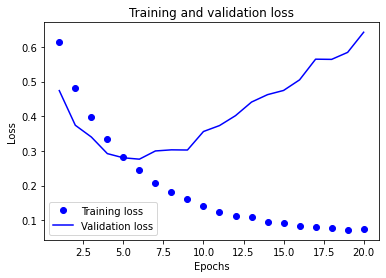

In [16]:
import matplotlib.pyplot as plt
history2_dr_dict = history2_dr.history
loss_values = history2_dr_dict["loss"]
val_loss_values = history2_dr_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Q3 Add l1 regularization on the second dense layer from the original model below. 

In [17]:
## Add l1 regularization on the second dense layers 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
model2_l1 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, kernel_regularizer = regularizers.l1(0.001), activation="relu"),    ### add l1 regularization here
    layers.Dense(2, activation="softmax")
])

### Finish the training and compare the dropout model(model from Q2) and l1 regularization model after visualizing their validation losses.

In [18]:
model2_l1.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
history2_l1 = model2_l1.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 51ms/step - loss: 0.5677 - accuracy: 0.7849 - val_loss: 0.4339 - val_accuracy: 0.8739
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.3504 - accuracy: 0.9031 - val_loss: 0.3464 - val_accuracy: 0.8895
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2673 - accuracy: 0.9257 - val_loss: 0.3218 - val_accuracy: 0.8905
Epoch 4/20
30/30 [==============================] - 1s 43ms/step - loss: 0.2169 - accuracy: 0.9430 - val_loss: 0.3189 - val_accuracy: 0.8879
Epoch 5/20
30/30 [==============================] - 1s 40ms/step - loss: 0.1787 - accuracy: 0.9566 - val_loss: 0.3235 - val_accuracy: 0.8897
Epoch 6/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1541 - accuracy: 0.9631 - val_loss: 0.3952 - val_accuracy: 0.8701
Epoch 7/20
30/30 [==============================] - 1s 42ms/step - loss: 0.1314 - accuracy: 0.9719 - val_loss: 0.3585 - val_accuracy: 0.8806
Epoch 8/20
30

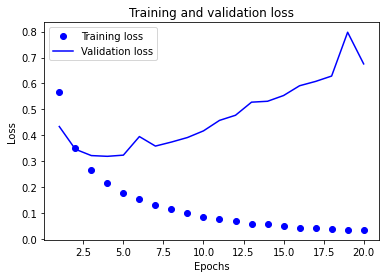

In [19]:
import matplotlib.pyplot as plt
history2_l1_dict = history2_l1.history
loss_values = history2_l1_dict["loss"]
val_loss_values = history2_l1_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()